# Projet Math-Info: Lignes de niveau
  $\quad$L’objectif de ce projet numérique est de développer un programme Python permettant de calculer les lignes de niveau d’une fonction $f$ de deux variables réelles et à valeurs réelles (supposée continûment différentiable), c’est-à-dire les ensembles de la forme\
$ \bf{\qquad {(x,y)∈ R^{2}|f(x,y)=c}}$ où $\bf{c∈R}.$ \
La représentation graphique de ces courbes est un tracé de contour (cf. les
exemples d’usage de la fonction contour de matplotlib).
## Sommaire:
 ### - find_seed
 ### - contour
 ### - simple_contour version "naïve"
 ### - simple_contour version "méthode de Newton"

In [2]:
import numpy as np
from math import *

def f(x,y):
    """
    fonction test
    """
    return(2*(exp(-x**2-y**2)-exp(-(x-1)**2-(y-1)**2)))

def g(x,y):
    """
    fonction test
    """
    return(sqrt(x**2+y**2))

## find_seed(g,c,delta)

### Remarque : 
 Ici par rapport aux notations des polycopiés, on a g qui est fonction d'une seule variable, c'est à dire par exemple $g(t) = f(0,t)$ pour tout t appartenant à $[0,1]$.

Une condition raisonnable sur $f, c, f(0,0)$ et  $f(0,1)$ (ou sur $g, c, g(0)$ et  $g(1))$ \
On peut demander au minimum $f   C^{0}$ et $ \min{(f(0,0),f(0,1))} \leq c \leq \max{(f(0,0),f(0,1))}$ ou encore plus généralement $g \ C^{0}$ et $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$. \
 Cela garantit en effet que c appartient à $g([0,1]) = f({0}\times[0,1])$ par le théorème des valeurs intermédiaires.
 
 Ce n'est pas une condition nécéssaire puisqu'il serait nécessaire et suffisant pour une fonction continue d'avoir $\inf(f) \leq c \leq \sup(f)$ sur $[0,1]$, mais cette condition est minimale pour une condition portant sur $g, g(0)$ et $g(1)$ puisqu'il existe des fonctions non continues vérifiant $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$ et c n'appartient pas à l'image de $[0,1]$ par g, et des fonctions continues telles que l'on n'est pas $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$ et c n'appartient pas à l'image de $[0,1]$ par g.

### Avec cette hypothèse sur g, on peut proposer une approche par dichotomie :
#### - invariant de boucle: $f(ta)= a \leq c \leq b \leq f(tb)$
#### - variant de boucle: $ta-tb = (\frac{1}{2})^{k}$

In [3]:
def find_seed(g, c=0, eps=2**(-26)):
    """
    recherche d'une solution de t de [0,1] tq g(t) = c,
    à condition que c soit dans [g(0),g(1)] ou [g(1),g(0)]
    """
    a, b = g(0),g(1)
    ta, tb = 0, 1
    if a > b:
        a, b = b, a
        ta, tb = tb, ta
    try:
        if c < a or c > b :
            raise ValueError
    except ValueError:
        return(None)
    #invariants: f(ta)=a<=c<=b=f(tb)
    t = (ta + tb)/2
    while abs(g(t)-c) > eps :
        if g(t) < c:
            a = g(t)
            ta = t
        else:
            b = g(t)
            tb = t
        t = (ta + tb)/2
    return t

## contour(f,c,xc,yc,delta)

 On supposera dans cette partie déjà écrite la fonction simple_contour.\
Le principe est de découper la zone en quadrillage avec les tableaux $xc$ et $yc$.\
Dans chaque case de ce quadrillage, on applique simple_contour à une fonction $ftilde$ qui correspond à $f$ par la transformation affine $(xa + (xb-xa).tx, ya + (yb-ya).ty)$\
On obtient les coordonnées des points de $[0,1]²$ en lesquels $ftilde$ vaut $c$\
On en déduit par $x,y = (xa + (xb-xa).tx, ya + (yb-ya).ty)$ les coordonnées des points dans $[xa,xb]\times[ya,yb]$ en lesquels $f$ vaut $c$.

In [4]:
def contour(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc) sous la forme de 2 listes de tableaux
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    return(xs,ys)

## simple_contour(f,c,delta) version "naïve"

On divise l'axe des abscisses en abscisses chacune écartée de $delta$ $(xi = i\times delta)$\
On trouve pour chacune de ces abscisses une ordonnée $yi$ grâce à find_seed avec la fonction $g(t) = f(xi,t)$

In [5]:
def simple_contour_naif(f,c=0.0,delta = 0.01):
    """
    renvoie une partie de courbe de niveau
    """
    x = np.arange(0,1,delta)
    y = np.zeros(len(x),dtype = float)
    for i,xi in enumerate(x):
        yi = find_seed(lambda t : f(xi,t),c)
        if yi == None:
            y[i] = None
        else:
            y[i] = yi
    return(x,y)

def contour_naif(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc) sous la forme de 2 listes de tableaux
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour_naif(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    return(xs,ys)

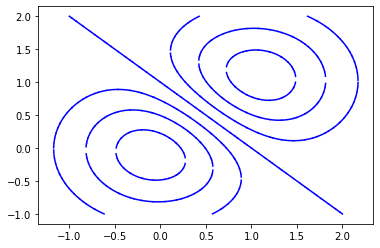

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in [-1.5,-1,-0.5,0,0.5,1,1.5]:
    xc, yc = np.linspace(-2.,3.,40), np.linspace(-1.,2.,40)
    xs, ys = contour_naif(f,c,xc,yc)
    for x,y in zip(xs,ys):
        plt.plot(x,y,'-b')
plt.show()


# simple_contour(f,c,delta) version "méthode de Newton"

Le principe est le suivant:
### 1) trouver une racine
On utilise pour cela find_seed pour la fonction $g(t) = f(xi,t)$ avec $xi = i.delta$ tant que $xi \leq 1$. On note le couple trouvé $(xc,yc)$
### 2) propagation
Le but est ici de trouver une autre racine à une distance delta de $(xc,yc)$. Pour cela, on utilise la méthode de Newton en dimension 2 avec la fonction $F(x,y)=(f(x,y) - c,(x-xc)^{2} + (y-yc)^{2} - delta^{2})$. On aura donc un couple $(x,y)$ qui vérifiera $f(x,y) = c$ et $d((x,y),(xc,yc))=delta$.

Il faut cependant trouver un point "pas trop loin de cette future racine" pour utiliser Newton. Une idée est de prendre un point à distance $delta$ de $(xc,yc)$ qui est sur la tangente à la courbe $f(x,y)=c$ au point $(xc,yc)$. On connaît un vecteur normal à la courbe avec le gradient: $ \large{n = \frac{\nabla {f}(xc,yc)}{||\nabla {f}(xc,yc)||}}$. 
On en déduit deux vecteurs tangent normés: $ T_1 = (-n_{1},n_{0})$ et $T_2 = -T_1$. On peut donc prendre comme point initial de la méthode de Newton $(x_0,y_0) = (xc,yc) + T_1$ ou $(x_0,y_0) = (xc,yc) + T_2$

Intérêt des vecteurs tangents: ils définissent le sens de parcours du contour (si la fonction n'est pas trop biscornue). Ainsi, si on pourrait croire que choisir un vecteur tangent nos fait perdre la partie non englobé par le sens de parcours, et bien il suffit donc de faire toute la courbe dans le sens de $T_1$, puis le reste dans le sens de $T_2$.

In [7]:
import autograd
from autograd import numpy as np

def newton_2D(f, x0, y0, fx = 0, fy = 0, eps = 2**(-26)):
    """
    méthode de newton pour f une fonction de R² dans R²
    renvoie un couple (x0,y0) qui représente les coordonnées d'une solution au 
    problème f(x,y) = (fx,fy)
    """
    def J_f(x,y):
        """
        donne le jacobien de f au point de coordonnées (x,y)
        sous la forme d'une matrice carrée
        """
        j = autograd.jacobian
        return np.c_[j(f,0)(x,y), j(f,1)(x,y)]
    
    imx, imy = f(x0,y0)[0], f(x0,y0)[1]
    c = np.array([[fx],
                  [fy]])
    pos = np.array([[x0],
                    [y0]])
    im = np.array([[imx],
                    [imy]])
    while max(abs(imx - fx), abs(imy - fy)) > eps:
        J = J_f(x0,y0)
        a,b,c,d = J[0,0],J[0,1],J[1,0],J[1,1]
        #test inversibilite de J
        if a*d-b*c == 0:
            raise ValueError("matrice non inversible")
        pos = pos + np.dot(np.linalg.inv(J),c-im)
        x0,y0 = pos[0][0],pos[1][0]
        imx,imy = f(x0,y0)[0], f(x0,y0)[1]
        pos = np.array([[x0],
                    [y0]])
        im = np.array([[imx],
                    [imy]])
    
    return(x0,y0)

In [12]:
def grad_f(f,x,y):
    """
    donne le gradient de la fonction à valeurs réelles au point de coordonnées (x,y)
    sous la forme d'un vecteur ligne
    """
    g = autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]

In [13]:
def G(x,y):
    return(g(x,y),g(x-1,y))
newton_2D(G,0.5,0.5,1,1)


TypeError: must be real number, not ArrayBox

18.454461336135864


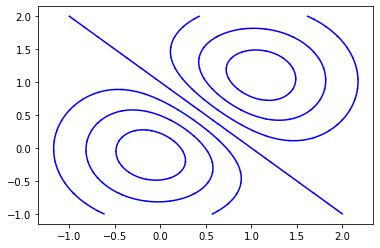

In [17]:
from math import *
import numpy as np
import autograd
from autograd import numpy as np
from scipy.optimize import newton
import matplotlib.pyplot as plt



def f(x,y):
    """
    fonction test
    """
    res = 2*(np.exp(-np.power(x,2)-np.power(y,2))-np.exp(-np.power(x-1,2)-np.power(y-1,2)))
    return(res)


def find_seed(g, c=0, eps=2**(-26)):
    """
    recherche d'une solution de t de [0,1] tq g(t) = c,
    à condition que c soit dans [g(0),g(1)]
    solution renvoyé sous la forme d'un float
    """
    a, b = g(0),g(1)
    ta, tb = 0, 1
    if a > b:
        a, b = b, a
        ta, tb = tb, ta
    try:
        if c < a or c > b :
            raise ValueError
    except ValueError:
        return(None)
    #invariants: f(ta)=a<=c<=b=f(tb)
    t = (ta + tb)/2
    while abs(g(t)-c) > eps :
        if g(t) < c:
            a = g(t)
            ta = t
        else:
            b = g(t)
            tb = t
        t = (ta + tb)/2
    return t


def grad_f(f,x,y):
    """
    donne le gradient de la fonction à valeurs réelles au point de coordonnées (x,y)
    sous la forme d'un vecteur ligne
    """
    g = autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]


def simple_contour_sc(f,c=0.0,delta = 0.01,):
    """
    renvoie une partie de courbe de niveau
    """
    maxiter = int(10/delta)
    x,y = [],[]
    exist_seed = False
    i = 0
    while not exist_seed:
        if i * delta > 1:
            return(np.array([],dtype = float),np.array([],dtype = float))
        yi = find_seed(lambda t: f(i*delta,t),c)
        if yi == None:
            i += 1
        else:
            x.append(i*delta)
            y.append(yi)
            exist_seed = True
    Xc, Yc = x[-1], y[-1]
    N = 0
    xc,yc = Xc, Yc
    while N < maxiter:
        grad = grad_f(f,xc,yc)
        tangent = np.array([-grad[1],grad[0]])/np.power(grad[0]**2 + grad[1]**2,1/2)*delta
        x0, y0 = xc + tangent[0], yc + tangent[1]
        def F(t):
            return (f(x0+t*grad[0],y0+t*grad[1])-c)
        tc = newton(F, 0)
        xc, yc = x0 + tc*grad[0], y0 + tc*grad[1]
        if xc<0 or xc>1 or yc<0 or yc >1:
            N = maxiter
        else:
            x.append(xc)
            y.append(yc)
            N += 1
    x.reverse()
    y.reverse()
    N = 0
    xc,yc = Xc, Yc
    while N <= maxiter:
        grad = grad_f(f,xc,yc)
        tangent = np.array([grad[1],-grad[0]])/np.power(grad[0]**2 + grad[1]**2,1/2)*delta
        x0, y0 = xc + tangent[0], yc + tangent[1]
        def F(t):
            return (f(x0+t*grad[0],y0+t*grad[1])-c)
        tc = newton(F, 0)
        xc, yc = x0 + tc*grad[0], y0 + tc*grad[1]
        if xc<0 or xc>1 or yc<0 or yc >1:
            return(np.array(x),np.array(y))
        x.append(xc)
        y.append(yc)
        N += 1
    return(np.array(x),np.array(y))


def contour_sc(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc)
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour_sc(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    return(xs,ys)

import time

top = time.time()
for i,c in enumerate([-1.5,-1.,-0.5,0,0.5,1.,1.5]):
    xc, yc = np.linspace(-2.,3.,20), np.linspace(-1.,2.,20)
    xs, ys = contour_sc(f,c,xc,yc)
    for x,y in zip(xs,ys):
        plt.plot(x,y,'b')

print(time.time()-top)
plt.show()
